# Comparison of two GNSS points within error ellipses
This script compares the distance of two GNSS points (Lat/Lon/Height Above Ellipsoid) within their uncertainties. 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import pi
import ipywidgets as widgets

## Input files
Insert the names of the output files. The files must be formatted as in the example attached. 

In [1]:
df = pd.read_csv('Example_data.csv')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Latitude (dec degrees)'], df['Longitude (dec degrees)']))
gdf.crs = 'epsg:4326'
gdf = gdf.to_crs('epsg:3857')
gdf['X (m)']=gdf.geometry.x
gdf['Y (m)']=gdf.geometry.y
gdf

NameError: name 'pd' is not defined

In [43]:
style = {'description_width': 'initial'}
name1=widgets.Dropdown(
    options=gdf['Point name'],
    description='Point 1',
    disabled=False,layout={'width': 'max-content'},style=style)
name2=widgets.Dropdown(
    options=gdf['Point name'],
    description='Point 2',
    disabled=False,layout={'width': 'max-content'},style=style)
display(name1, name2)

Dropdown(description='Point 1', layout=Layout(width='max-content'), options=('Topographic coordinates IGN', 'S…

Dropdown(description='Point 2', layout=Layout(width='max-content'), options=('Topographic coordinates IGN', 'S…

## Plots
The two points are plotted to show how they compare in lat/lon and Ellipsoid Height. Plots include uncertainties, incorporated as 2-sigma from the RTKlib output.

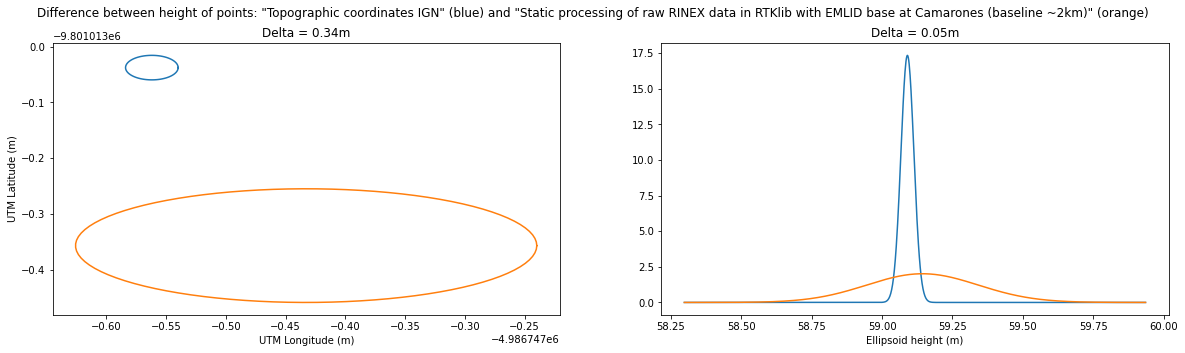

In [48]:
pt1=gdf.loc[gdf['Point name'] == name1.value].reset_index()
pt2=gdf.loc[gdf['Point name'] == name2.value].reset_index()

fig, (ax2, ax1) = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Difference between height of points: "{}" (blue) and "{}" (orange)'.format(name1.value,name2.value))

llim=min(pt1['Height above ellipsoid (m)'][0],pt2['Height above ellipsoid (m)'][0])-4*max(pt1['Elevation 2-sigma (m)'][0],pt2['Elevation 2-sigma (m)'][0])
ulim=max(pt1['Height above ellipsoid (m)'][0],pt2['Height above ellipsoid (m)'][0])+4*max(pt1['Elevation 2-sigma (m)'][0],pt2['Elevation 2-sigma (m)'][0])

x = np.linspace(llim,ulim, 1000)
ax1.plot(x, stats.norm.pdf(x, pt1['Height above ellipsoid (m)'][0], pt1['Elevation 2-sigma (m)'][0]))
ax1.plot(x, stats.norm.pdf(x, pt2['Height above ellipsoid (m)'][0], pt2['Elevation 2-sigma (m)'][0]))
DeltaH=abs(pt1['Height above ellipsoid (m)'][0]-pt2['Height above ellipsoid (m)'][0])
ax1.set(xlabel='Ellipsoid height (m)', title='Delta = {:.2f}m'.format(DeltaH))

f = np.linspace(0, 2*pi, 100)
ax2.plot(pt1['X (m)'][0]+pt1['Longitude 2-sigma (m)'][0]*np.cos(f) , pt1['Y (m)'][0]+pt1['Latitude 2-sigma (m)'][0]*np.sin(f))
ax2.plot(pt2['X (m)'][0]+pt2['Longitude 2-sigma (m)'][0]*np.cos(f) , pt2['Y (m)'][0]+pt2['Latitude 2-sigma (m)'][0]*np.sin(f))

def distance_cartesian(x1, y1, x2, y2):
    dx = x1 - x2
    dy = y1 - y2
    return np.sqrt(dx * dx + dy * dy)

DeltaPos=(distance_cartesian(pt1['X (m)'][0], pt1['Y (m)'][0], pt2['X (m)'][0], pt2['Y (m)'][0]))

ax2.set(xlabel='UTM Longitude (m)',ylabel='UTM Latitude (m)',title='Delta = {:.2f}m'.format(DeltaPos))

plt.savefig('GNSS_comparison.svg')
plt.show()


***
## License
This software is relased under the MIT license.

Copyright 2021 Alessio Rovere

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
***
# Research funding acknowledgments
This script and associated data were created in the framework of the European Reasearch Council Starting Grant WARMCOASTS (Grant Agreement Number 802414), funded under the European Union's Horizon 2020 research and Innovation programme.
***
# Code acknowledgments
https://stackoverflow.com/questions/46852395/measure-distance-between-lat-lon-coordinates-and-utm-coordinates